# Analysis of cortical network model

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from network import NeuralNetwork
from utils import pressure_to_intensity

## Stimulus parameters

In [3]:
start = 200 # ms
dur = 150  # ms
tstop = 1000  # ms
Pmax = 3e6  # Maximal acoustic pressure amplitude (Pa)

# Convert pressure to intensity
Iref = pressure_to_intensity(Pmax) / 1e4  # (W/cm2)

## Initial model (no temperature dependence)

 22/11/2023 18:19:55: NeuralNetwork(1): created 1 node
 22/11/2023 18:19:55: NeuralNetwork(1): setting gMbar = 0 on node 0
 22/11/2023 18:19:55: NeuralNetwork(1): initialized
 22/11/2023 18:19:55: NeuralNetwork(1): setting 150.00 ms stimulus with node-specific amplitudes:
    - node 0: 278.2 W/cm2
 22/11/2023 18:19:55: NeuralNetwork(1): disabled currents: iM, iKT, iNaKPump
 22/11/2023 18:19:55: NeuralNetwork(1): simulating for 1000.00 ms
 22/11/2023 18:19:55: NeuralNetwork(1): extracting output results
 22/11/2023 18:19:55: NeuralNetwork(1): max temperature increase:
    - node 0: ΔT = 3.7 °C
 22/11/2023 18:19:55: NeuralNetwork(1): number of elicited spikes:
    - node 0: n = 0 spikes
 22/11/2023 18:19:55: NeuralNetwork(1): elicited firing rate:
    - node 0: FR = N/A  Hz
 22/11/2023 18:19:55: NeuralNetwork(1): plotting results
 22/11/2023 18:19:55: NeuralNetwork(1): removing stimulus
 22/11/2023 18:19:55: NeuralNetwork(1): setting ibaseline = 0.000345 on node 0
 22/11/2023 18:19:55: N

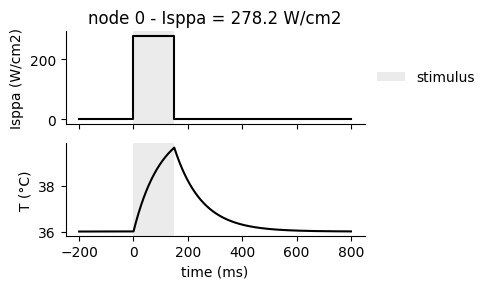

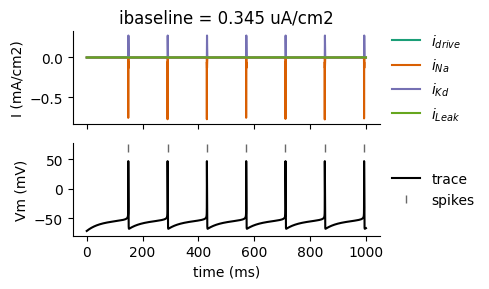

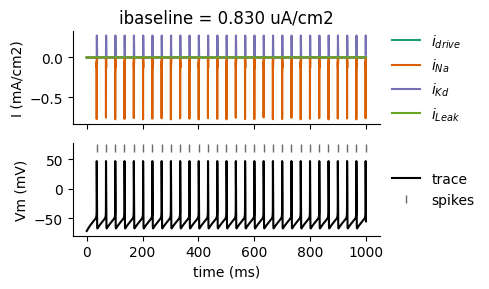

In [4]:
# Initialize single-node model, with:
# -  no M-type K+ current
# -  no temperature-dependent components
model = NeuralNetwork(1, gMbar=0)

# Set stimulus
model.set_stim(Iref, start=start, dur=dur)

# Run simulation and plot results of thermal model only
t, outvecs = model.simulate(tstop=tstop)
fig = model.plot_results(t, outvecs, include='T')

# Remove stimulus
model.remove_stim()

# Define a set of baseline currents to test
baselines = {
    'normal': 3.45e-4, # mA/cm2 (for baseline spiking at 7 Hz)
    'high': 8.3e-4  # mA/cm2 (for high-frequency spiking at 30 Hz)
}

# For each baseline current, run simulation and plot results
for name, ibaseline in baselines.items():
    model.set_mech_param(ibaseline=ibaseline)
    t, outvecs = model.simulate()
    fig = model.plot_results(t, outvecs, exclude=['conductances', 'T'])
    fig.axes[0].set_title(f'ibaseline = {ibaseline * 1e3:.3f} uA/cm2')


# Reset stimulus
model.set_stim(Iref, start=start, dur=dur)

## Adding temperature-dependent components

### Q10 for gating kinetics

 22/11/2023 18:19:56: NeuralNetwork(1): setting Q10_rates = 3 on node 0
 22/11/2023 18:19:56: NeuralNetwork(1): disabled currents: iM, iKT, iNaKPump
 22/11/2023 18:19:56: NeuralNetwork(1): simulating for 1000.00 ms
 22/11/2023 18:19:57: NeuralNetwork(1): extracting output results
 22/11/2023 18:19:57: NeuralNetwork(1): max temperature increase:
    - node 0: ΔT = 3.7 °C
 22/11/2023 18:19:57: NeuralNetwork(1): number of elicited spikes:
    - node 0: n = 31 spikes
 22/11/2023 18:19:57: NeuralNetwork(1): elicited firing rate:
    - node 0: FR = 31.9 ±2.6 Hz
 22/11/2023 18:19:57: NeuralNetwork(1): plotting results


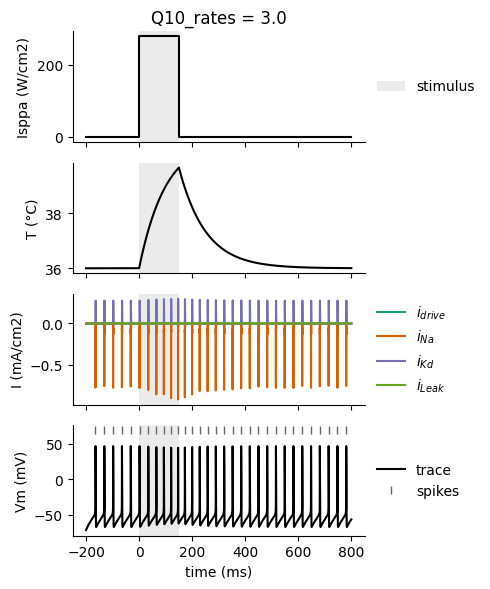

In [5]:
# Set Q10 coefficient for temperature dependence of gating transitions (Ganguly et al., 2019)
model.set_mech_param(Q10_rates=3)

# Run simulation and plot results
t, outvecs = model.simulate()
fig = model.plot_results(t, outvecs, exclude='conductances')
fig.axes[0].set_title(f'Q10_rates = {model.Q10_rates:.1f}');

### Q10 for maximal channel conductances 

 22/11/2023 18:19:57: NeuralNetwork(1): setting Q10_gNa = 1.4 on node 0
 22/11/2023 18:19:57: NeuralNetwork(1): setting Q10_gKd = 4.75 on node 0
 22/11/2023 18:19:57: NeuralNetwork(1): disabled currents: iM, iKT, iNaKPump
 22/11/2023 18:19:57: NeuralNetwork(1): simulating for 1000.00 ms
 22/11/2023 18:19:57: NeuralNetwork(1): extracting output results
 22/11/2023 18:19:57: NeuralNetwork(1): max temperature increase:
    - node 0: ΔT = 3.7 °C
 22/11/2023 18:19:57: NeuralNetwork(1): number of elicited spikes:
    - node 0: n = 29 spikes
 22/11/2023 18:19:57: NeuralNetwork(1): elicited firing rate:
    - node 0: FR = 30.0 ±0.1 Hz
 22/11/2023 18:19:57: NeuralNetwork(1): plotting results


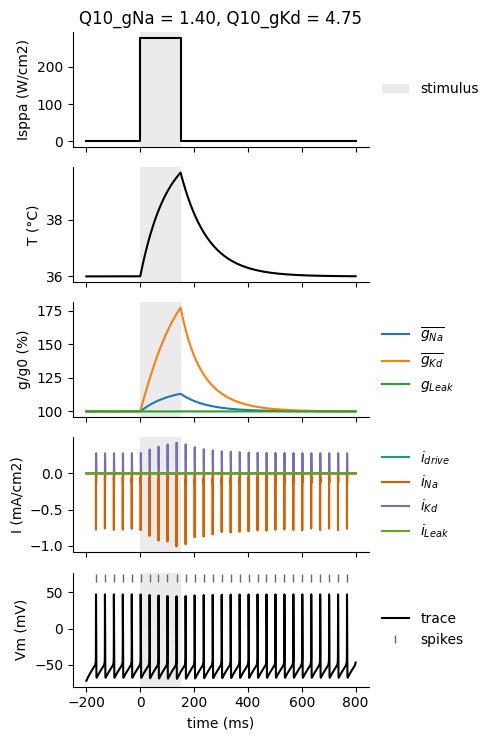

In [6]:
# Set Q10 coefficient for temperature dependence iNa and iKd maximal conductances (Ganguly et al., 2019)
model.set_mech_param(
    Q10_gNa=1.40,  # approximative fit to Fig. S1D in Ganguly et al., 2019
    Q10_gKd=4.75,  # approximative fit to Fig. S1D in Ganguly et al., 2019
)

# Run simulation and plot results
t, outvecs = model.simulate()
fig = model.plot_results(t, outvecs, gmode='rel')
fig.axes[0].set_title(f'Q10_gNa = {model.Q10_gNa:.2f}, Q10_gKd = {model.Q10_gKd:.2f}');

### Na-K pump with temperature-dependent conductance

 22/11/2023 18:19:58: NeuralNetwork(1): setting gNaKPump = 7e-06 on node 0
 22/11/2023 18:19:58: NeuralNetwork(1): setting Q10_gNaK = 1.88 on node 0
 22/11/2023 18:19:58: NeuralNetwork(1): disabled currents: iM, iKT
 22/11/2023 18:19:58: NeuralNetwork(1): simulating for 1000.00 ms
 22/11/2023 18:19:58: NeuralNetwork(1): extracting output results
 22/11/2023 18:19:58: NeuralNetwork(1): max temperature increase:
    - node 0: ΔT = 3.7 °C
 22/11/2023 18:19:58: NeuralNetwork(1): number of elicited spikes:
    - node 0: n = 0 spikes
 22/11/2023 18:19:58: NeuralNetwork(1): elicited firing rate:
    - node 0: FR = N/A  Hz
 22/11/2023 18:19:58: NeuralNetwork(1): plotting results
 22/11/2023 18:19:58: NeuralNetwork(1): setting gNaKPump = 1e-07 on node 0
 22/11/2023 18:19:58: NeuralNetwork(1): disabled currents: iM, iKT
 22/11/2023 18:19:58: NeuralNetwork(1): simulating for 1000.00 ms
 22/11/2023 18:19:58: NeuralNetwork(1): extracting output results
 22/11/2023 18:19:58: NeuralNetwork(1): max te

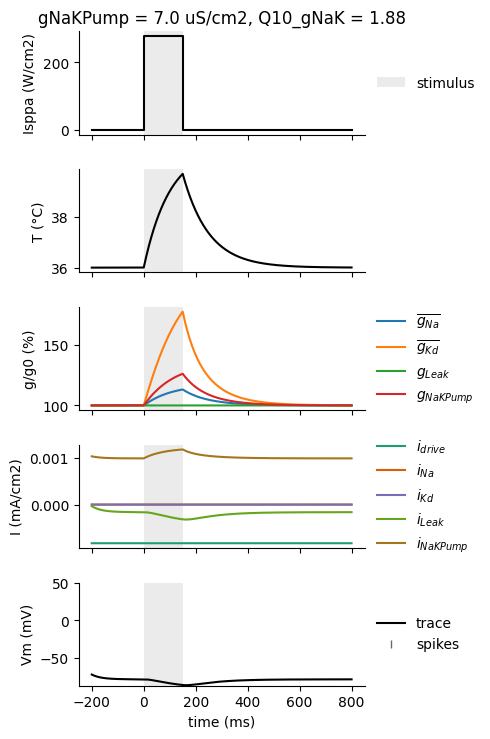

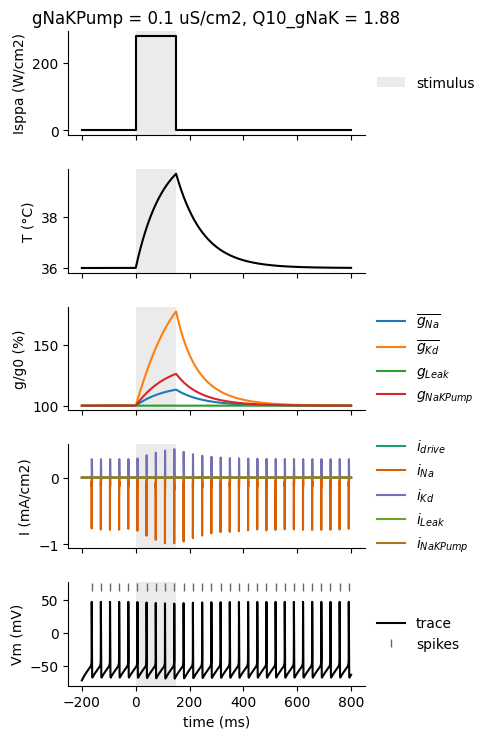

In [7]:
# Add temperature-dependent NaK pump conductance (Ganguly et al., 2019)
model.set_mech_param(
    gNaKPump=7e-6,  # from Ganguly et al., 2019
    Q10_gNaK=1.88  # from Ganguly et al., 2019 
)

# Run simulation and plot results
t, outvecs = model.simulate()
fig = model.plot_results(t, outvecs, gmode='rel')
fig.axes[0].set_title(f'gNaKPump = {model.gNaKPump * 1e6:.1f} uS/cm2, Q10_gNaK = {model.Q10_gNaK:.2f}')

# Decrease baseline gNaK conductance to prevent impact on spontaneous spiking
model.set_mech_param(gNaKPump=1e-7)

# Run simulation and plot results
t, outvecs = model.simulate()
fig = model.plot_results(t, outvecs, gmode='rel')
fig.axes[0].set_title(f'gNaKPump = {model.gNaKPump * 1e6:.1f} uS/cm2, Q10_gNaK = {model.Q10_gNaK:.2f}')

# Remove gNaK current for further analyses
model.set_mech_param(gNaKPump=0)

### Thermally-activated K+ current

 22/11/2023 18:19:59: NeuralNetwork(1): setting gKT = 2.441077441077441e-06 on node 0
 22/11/2023 18:19:59: NeuralNetwork(1): disabled currents: iM, iNaKPump
 22/11/2023 18:19:59: NeuralNetwork(1): simulating for 1000.00 ms
 22/11/2023 18:20:00: NeuralNetwork(1): extracting output results
 22/11/2023 18:20:00: NeuralNetwork(1): max temperature increase:
    - node 0: ΔT = 3.7 °C
 22/11/2023 18:20:00: NeuralNetwork(1): number of elicited spikes:
    - node 0: n = 27 spikes
 22/11/2023 18:20:00: NeuralNetwork(1): elicited firing rate:
    - node 0: FR = 27.9 ±3.5 Hz
 22/11/2023 18:20:00: NeuralNetwork(1): plotting results
 22/11/2023 18:20:00: NeuralNetwork(1): setting gKT = 4.882154882154882e-06 on node 0
 22/11/2023 18:20:00: NeuralNetwork(1): disabled currents: iM, iNaKPump
 22/11/2023 18:20:00: NeuralNetwork(1): simulating for 1000.00 ms
 22/11/2023 18:20:00: NeuralNetwork(1): extracting output results
 22/11/2023 18:20:00: NeuralNetwork(1): max temperature increase:
    - node 0: ΔT

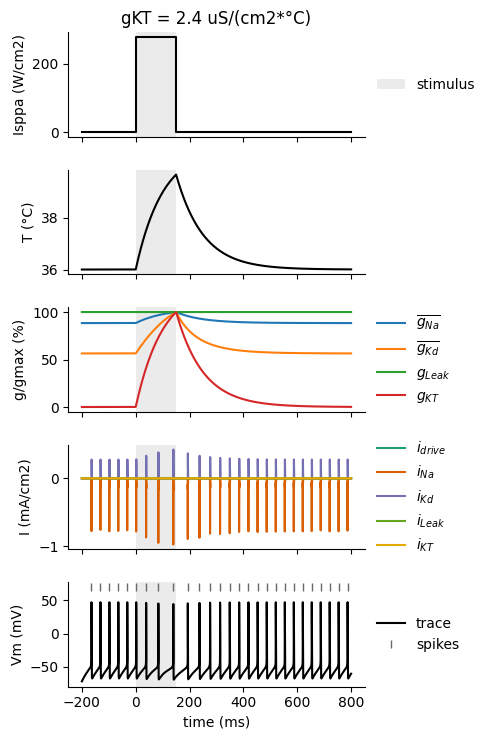

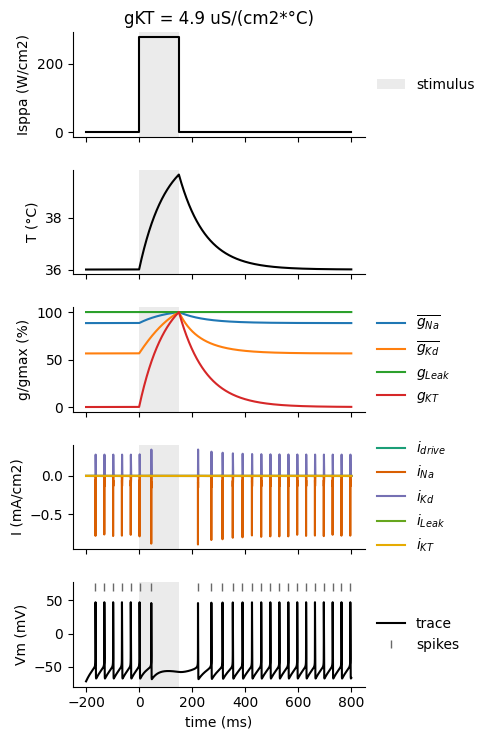

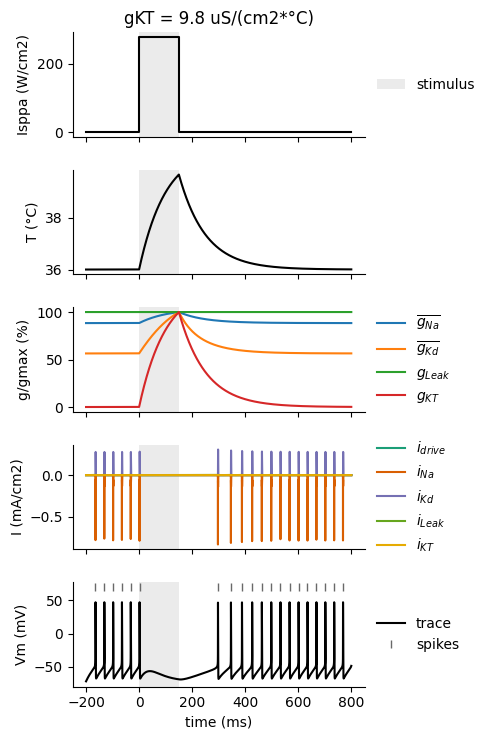

In [8]:
# Define range of temperature values to test

# Add passive inhibitory K+ current with conductance proportional to temperature increase

# Compute temperature-dependent K+ current conductance increase per degree Celsius, 
# using data from Owen et al., 2019 and Pospischil et al., 2008
A = 11.88e3  # surface area of a single node (um2), from Pospischil et al., 2008
GKT = 0.58e-9  # KT conductance increase per ΔT (nS/°C), extracted from Owen et al., 2019
gKT = GKT / (A * 1e-8)  # KT conductance increase per ΔT (S/(cm2*°C))

# Define a bunch of gKT values to test, based on this reference value
gKT_range = np.array([0.5, 1, 2]) * gKT

# For each gKT value, run simulation and plot results
for x in gKT_range:
    model.set_mech_param(gKT=x)
    t, outvecs = model.simulate()
    fig = model.plot_results(t, outvecs, gmode='norm')
    fig.axes[0].set_title(f'gKT = {model.gKT * 1e6:.1f} uS/(cm2*°C)')

# Reset gKT to reference value
model.set_mech_param(gKT=gKT)

## Visualize inhibition across the intensity range

 22/11/2023 18:20:02: NeuralNetwork(1): running simulation sweep across 10 stimulus intensities


100%|██████████| 10/10 [00:01<00:00,  5.36it/s]


 22/11/2023 18:20:04: NeuralNetwork(1): setting 150.00 ms stimulus with node-specific amplitudes:
    - node 0: 278.2 W/cm2


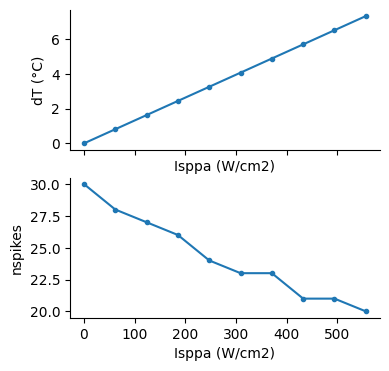

In [9]:
# Run sweep for Isppa range, and plot max temperature elevation and spike counts vs Isppa
Isppa_range = np.linspace(0, 2 * Iref, 10)
t, outs = model.run_sweep(Isppa_range)
fig = model.plot_sweep_results(Isppa_range, t, outs, ['dT', 'nspikes'])

# Reset stimulus amplitude to reference value
model.set_stim(Iref)

## Adding intensity-dependent excitation component

 22/11/2023 18:23:22: NeuralNetwork(1): setting gamma = 1e-06 on node 0
 22/11/2023 18:23:22: NeuralNetwork(1): disabled currents: iM, iNaKPump
 22/11/2023 18:23:22: NeuralNetwork(1): simulating for 1000.00 ms
 22/11/2023 18:23:22: NeuralNetwork(1): extracting output results
 22/11/2023 18:23:22: NeuralNetwork(1): max temperature increase:
    - node 0: ΔT = 3.7 °C
 22/11/2023 18:23:22: NeuralNetwork(1): number of elicited spikes:
    - node 0: n = 4 spikes
 22/11/2023 18:23:22: NeuralNetwork(1): elicited firing rate:
    - node 0: FR = 6.7 ±3.9 Hz
 22/11/2023 18:23:22: NeuralNetwork(1): plotting results
 22/11/2023 18:23:22: Cannot compute relative conductance for g_{KT}: baseline is 0
 22/11/2023 18:23:22: NeuralNetwork(1): setting gamma = 3.162277660168379e-06 on node 0
 22/11/2023 18:23:22: NeuralNetwork(1): disabled currents: iM, iNaKPump
 22/11/2023 18:23:22: NeuralNetwork(1): simulating for 1000.00 ms
 22/11/2023 18:23:23: NeuralNetwork(1): extracting output results
 22/11/2023 

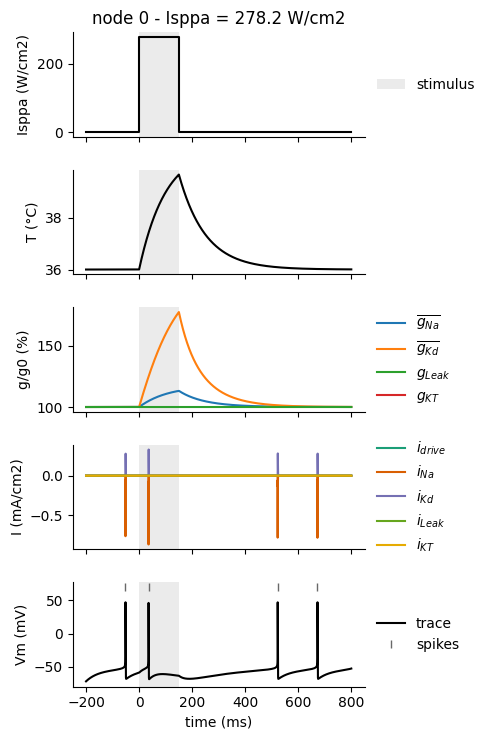

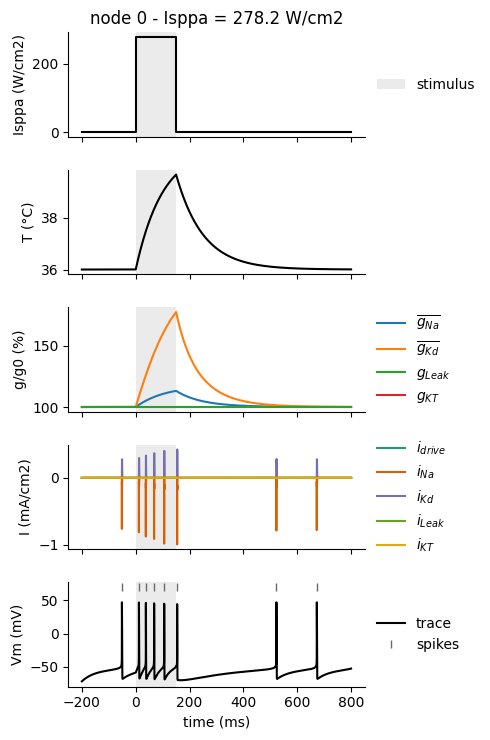

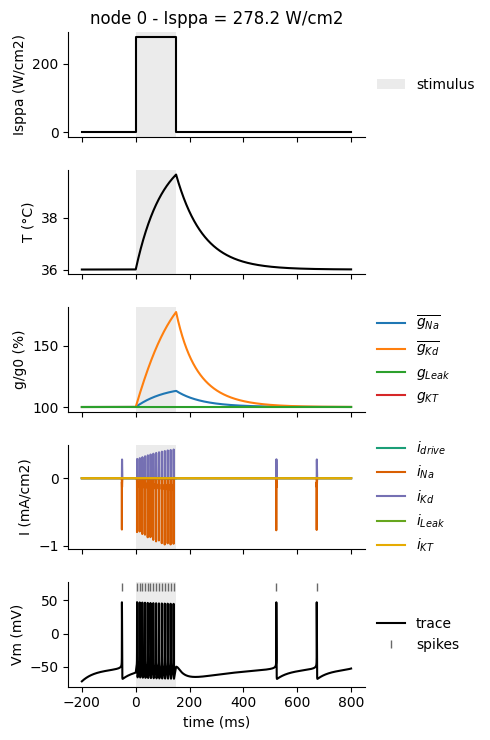

In [18]:
# Reset baseline drive to "normal" value
model.set_mech_param(ibaseline=baselines['normal'])

# Explore a range of depolarizing forces (gamma) to test their impact on spike count
gamma_range = np.logspace(-6, -5, 3) # depolarizing force per stimulus intensity unit (mA/W)
for gamma in gamma_range:
    model.set_mech_param(gamma=gamma)
    t, outvecs = model.simulate()
    fig = model.plot_results(t, outvecs, gmode='rel')

## Expand to network

In [ ]:
# # %% Expand to 3 nodes

# model = NeuralNetwork(3, params=params)
# Isppa = np.ones(model.size) * Iref  # W/cm2
# model.set_stim(start, dur, Isppa)
# t, outvecs = model.simulate(tstop)
# fig = model.plot_results(t, outvecs)

# # %% Increase syaptic weight to achieve network entrainment

# for w in [.001, .005, .01]:
#     model.set_synaptic_weight(w)
#     t, outvecs = model.simulate(tstop)
#     fig = model.plot_results(t, outvecs, title=f'w = {w} uS')
# model.set_synaptic_weight(.002)


# # %% Compare single-focus vs multi-focus stimulation (intensity-matched)

# # Define stimulus distributions per node
# stim_dists = {
#     'single-node': np.array([1, 0, 0]),
#     'multi-node': np.array([1, 1, 1])
# }

# # Run simulation for each stimulus distribution
# for k, stim_dist in stim_dists.items():
#     model.set_stim(start, dur, stim_dist * Iref)
#     t, outvecs = model.simulate(tstop)
#     fig = model.plot_results(
#         t, outvecs, 
#         title=f'{model}, {k} stimulation (Isppa-matched)')


# # %% Extend comparison with sweep across Isppa

# # Sweep parameters
# Isppa_range = np.linspace(0, Iref, 15)

# # Run sweep for each stimulus distribution, and store spike counts per node
# nspikes = {
#     k: model.get_nspikes_across_sweep(stim_dist, Isppa_range, start, dur, tstop) 
#     for k, stim_dist in stim_dists.items()
# }

# # Plot spike counts vs Isppa for each node and each stimulus distribution
# fig, axes = plt.subplots(1, len(stim_dists), sharey=True, figsize=(5 * len(stim_dists), 4))
# for ax, k in zip(axes, nspikes):
#     model.plot_sweep_results(Isppa_range, nspikes[k], title=f'{k} stimulation', ax=ax)


# # %% Compare single-focus vs multi-focus stimulation in power-matched sweeps

# # Normalize stimulus distributions to sum up to 1
# stim_dists = {k: v / v.sum() for k, v in stim_dists.items()}

# # Run sweep for each stimulus distribution, and store spike counts per node
# nspikes = {
#     k: model.get_nspikes_across_sweep(stim_dist, Isppa_range, start, dur, tstop) 
#     for k, stim_dist in stim_dists.items()
# }

# # Plot spike counts vs Isppa for each node and each stimulus distribution
# fig, axes = plt.subplots(1, len(stim_dists), sharey=True, figsize=(5 * len(stim_dists), 4))
# for ax, k in zip(axes, nspikes):
#     model.plot_sweep_results(Isppa_range, nspikes[k], title=f'{k} stimulation', ax=ax)

# %% Render
plt.show()
